# Exploratory Data Analysis (EDA) of the Titanic dataset

Data source: https://www.kaggle.com/c/titanic

Goal of this excercise is to try to solve series of tasks which are very similar to the tasks you will face during working on the first (EDA) project in ZSU 

The idea is that you will take a look at the dataset which you have, probably, no prior knowledge and try to form a few hypotheses (de facto circa 3-5 questions) about the data and you will try to find an answers to them. 

**It is mandatory to write down your gained insight about each of the hypotheses in your notebook!**

#### Data Dictionary

|Variable|Definition|Key|
|:-------|:-------|:--------|
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex||
|Age|Age in years||
|sibsp|# of siblings / spouses aboard the Titanic||
|parch|# of parents / children aboard the Titanic||
|ticket|Ticket number||
|fare|Passenger fare||
|cabin|Cabin number||
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## Import used packages

In [1]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use

## Load the data into the Pandas DataFrame - in our case it is a csv file

In [2]:
df = pd.read_csv('titanic.csv', sep=',')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Task 1
**Description:** Is there any effect caused by type of sex on survivability?

**Insight gained:** Oproti ženám je počet přeživších u mužů poloviční.

<AxesSubplot:xlabel='Sex', ylabel='Count'>

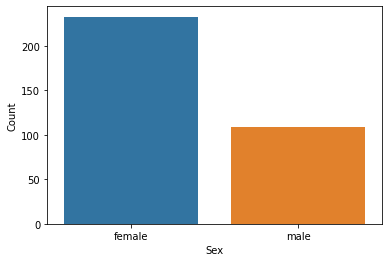

In [58]:

survivors = df[(df.Survived == 1)]
df2 = survivors.groupby("Sex").Name.count().reset_index(name='Count')
df2
sns.barplot(data=df2, x="Sex", y="Count")

Třída lístku x přežití

Třída lístku neměla příliš vliv na přežití


<AxesSubplot:xlabel='Pclass', ylabel='Count'>

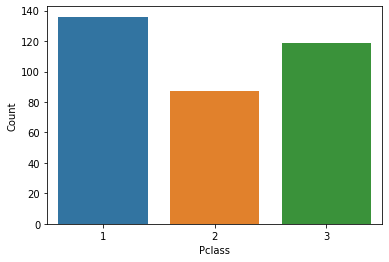

In [61]:
tickets = survivors.groupby("Pclass").Name.count().reset_index(name="Count")
sns.barplot(data=tickets, x="Pclass", y="Count")

Vliv věku na přežití + pohlaví

<AxesSubplot:xlabel='Age', ylabel='Count'>

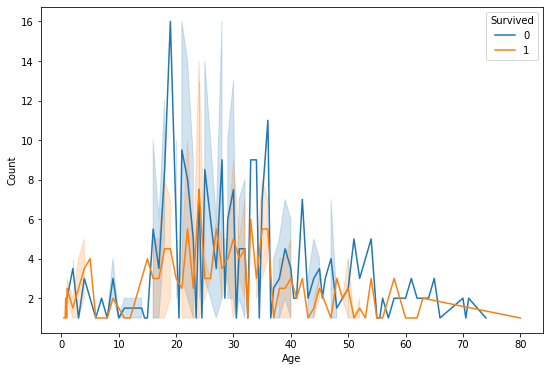

In [75]:
fig = plt.figure(figsize=(9,6))
sex = df.groupby(["Sex", "Survived", "Age"]).Name.count().reset_index(name="Count")
sex
sns.lineplot(data=sex, x="Age", y="Count", hue="Survived")

Větší šance na přežití u těch, co měli děti

<AxesSubplot:xlabel='Survived', ylabel='Count'>

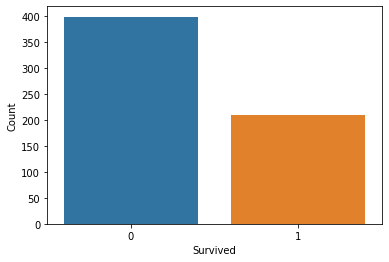

In [81]:
nosib = df.loc[(df.SibSp == 0)].groupby("Survived").Survived.count().reset_index(name="Count")
nosib

sns.barplot(data=nosib, x="Survived", y="Count")


<AxesSubplot:xlabel='Survived', ylabel='Count'>

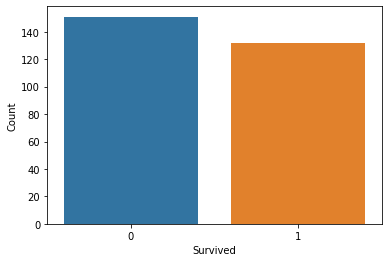

In [82]:
hassib = df.loc[(df.SibSp > 0)].groupby("Survived").Survived.count().reset_index(name="Count")
hassib
sns.barplot(data=hassib, x="Survived", y="Count")